# **Modelling and Evaluation Notebook**

## Objectives

* Answer business requirement 2:

The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train
* inputs/cherry_leaves_dataset/cherry-leaves/test
* inputs/cherry_leaves_dataset/cherry-leaves/validation
* image shape embeddings.

## Outputs

* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.

## Additional Comments

* No additional comments.



---

# Import regular packages

In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

**Set Working Directory**

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspace/mildew-cherry-leaves-project')
print("You set a new current directory")

You set a new current directory


In [4]:

work_dir = os.getcwd()
work_dir

'/workspace/mildew-cherry-leaves-project'

___

**Set input directories**

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'
my_data_dir

'inputs/cherry_leaves_dataset/cherry-leaves'

**Set output directory**

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


**Set labels**

In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['healthy', 'powdery_mildew']


**Set image shape**

In [8]:

## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images in train, test and validation data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




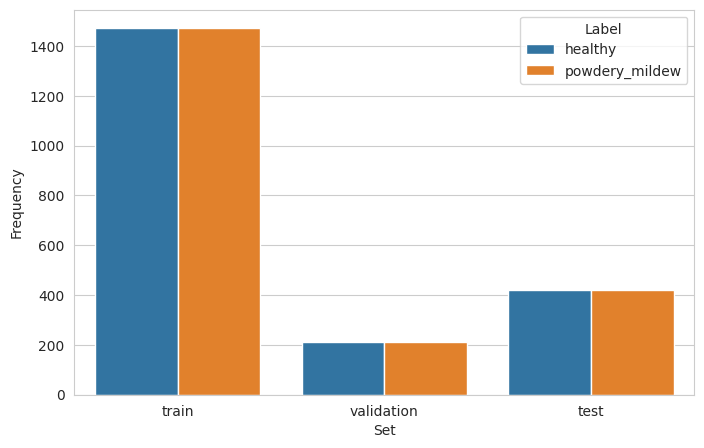

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

<Figure size 800x500 with 0 Axes>

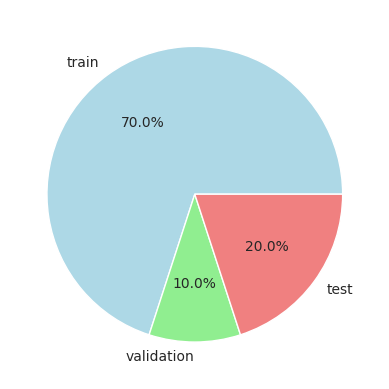

In [10]:
plt.figure(figsize=(8,5))
dataset_labels = 'train', 'validation', 'test'
sizes = [70, 10, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=dataset_labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral']) 

plt.savefig(f'{file_path}/labels_pie.png', bbox_inches='tight', dpi=150) 

---

# Image data augmentation

**ImageDataGenerator**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* Initialize ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )


* Augment training image dataset

In [13]:

batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* Augment validation image dataset

In [14]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* Augment test image dataset

In [15]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

**Plot augmented training image**

(20, 256, 256, 3)


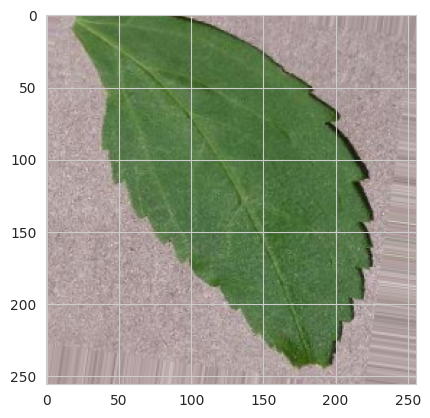

(20, 256, 256, 3)


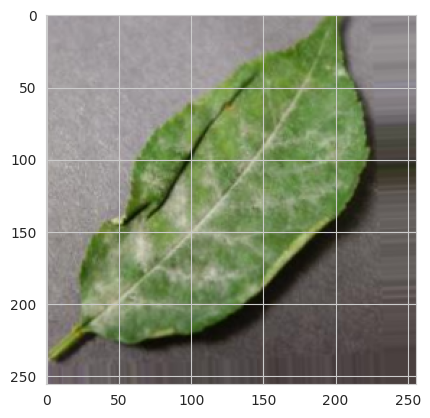

(20, 256, 256, 3)


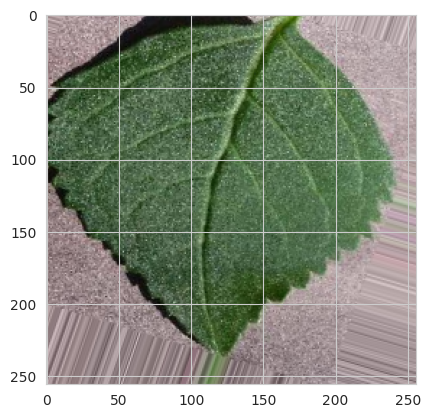

In [16]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

**Plot augmented validation and test images**

(20, 256, 256, 3)


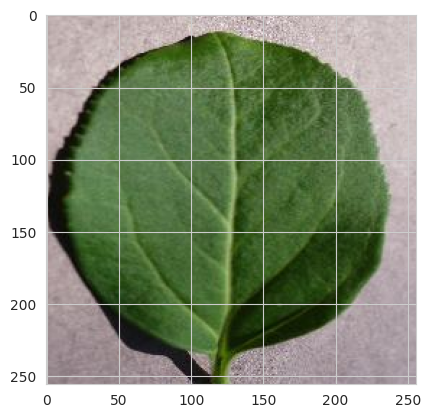

(20, 256, 256, 3)


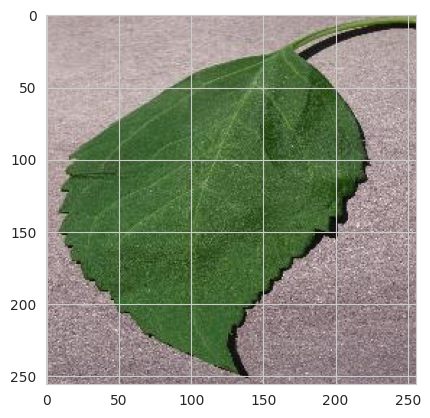

(20, 256, 256, 3)


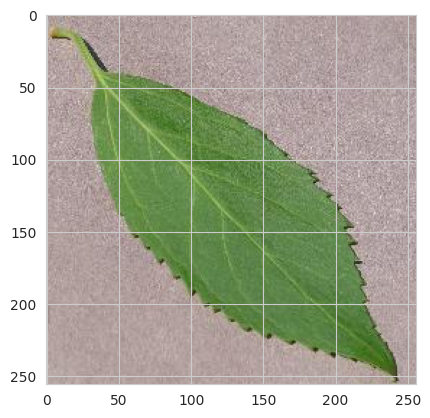

In [17]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

(20, 256, 256, 3)


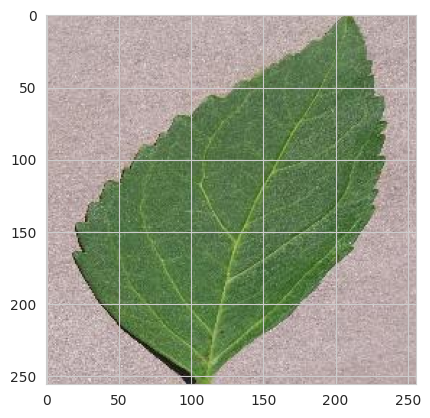

(20, 256, 256, 3)


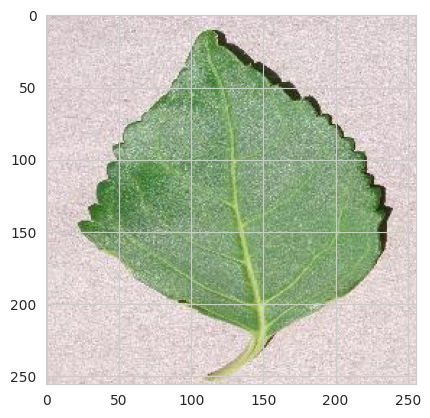

(20, 256, 256, 3)


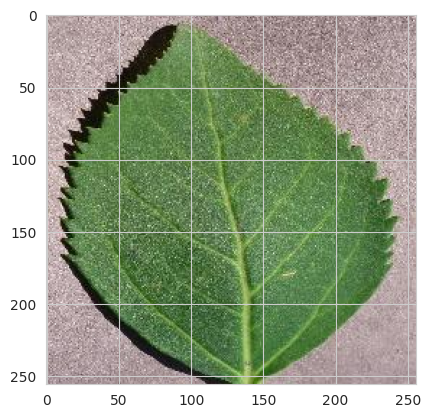

In [18]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

**Save class_indices**

In [19]:

joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model creation

**ML model**

* Import model packages

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

* Model

In [21]:
def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


* Model Summary

In [22]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

2024-05-24 13:04:28.189385: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* Early Stopping

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

**Fit model for model training**

In [24]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

2024-05-24 13:04:28.974048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2024-05-24 13:04:29.904681: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.
2024-05-24 13:04:31.499325: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.


  1/147 [..............................] - ETA: 7:18 - loss: 0.6882 - accuracy: 0.6000

2024-05-24 13:04:31.995845: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.
2024-05-24 13:04:33.609765: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.


  2/147 [..............................] - ETA: 5:18 - loss: 0.9155 - accuracy: 0.6000

2024-05-24 13:04:34.193540: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.


147/147 [==============================] - 267s 2s/step - loss: 0.2861 - accuracy: 0.8694 - val_loss: 0.0398 - val_accuracy: 0.9929
Epoch 2/25
147/147 [==============================] - 235s 2s/step - loss: 0.1203 - accuracy: 0.9610 - val_loss: 0.1131 - val_accuracy: 0.9810
Epoch 3/25
147/147 [==============================] - 215s 1s/step - loss: 0.0497 - accuracy: 0.9867 - val_loss: 0.0333 - val_accuracy: 0.9952
Epoch 4/25
147/147 [==============================] - 230s 2s/step - loss: 0.0593 - accuracy: 0.9788 - val_loss: 0.0378 - val_accuracy: 0.9905
Epoch 5/25
147/147 [==============================] - 250s 2s/step - loss: 0.0250 - accuracy: 0.9935 - val_loss: 0.0412 - val_accuracy: 0.9881
Epoch 6/25
147/147 [==============================] - 239s 2s/step - loss: 0.0375 - accuracy: 0.9897 - val_loss: 0.0306 - val_accuracy: 0.9929
Epoch 7/25
147/147 [==============================] - 241s 2s/step - loss: 0.0131 - accuracy: 0.9942 - val_loss: 0.0164 - val_accuracy: 0.9976
Epoch 8/25

* Save model

In [25]:
model.save('outputs/v1/powdery_mildew_detector_model.h5')

---

# Model Performace

**Model learning curve**

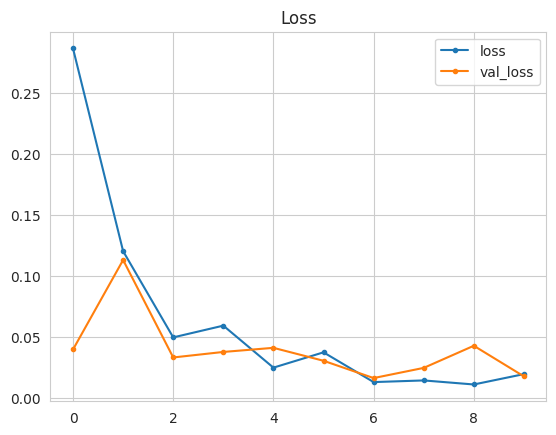

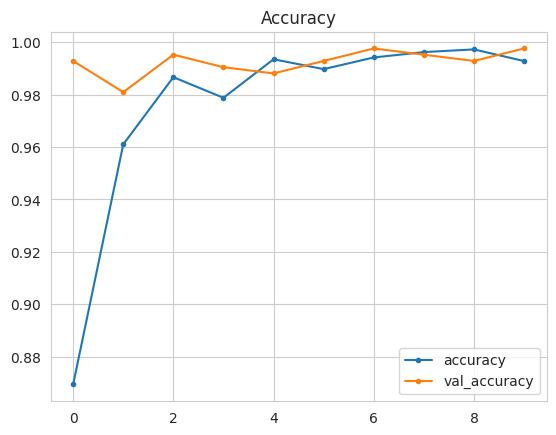

In [26]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

**Model Evaluation**

Load saved model

In [27]:
from keras.models import load_model
model = load_model('outputs/v1/powdery_mildew_detector_model.h5')

Evaluate model on test set

In [28]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 10s 224ms/step - loss: 0.0442 - accuracy: 0.9882


**Save evaluation pickle**

In [29]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

**Predict on new data**

Load a random image as PIL

inputs/cherry_leaves_dataset/cherry-leaves/test
healthy
Image shape: (256, 256), Image mode: RGB


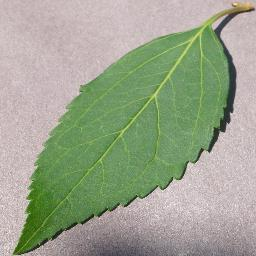

In [30]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]  # select healthy or Powdery Mildew
print(test_path)
print(label)
pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image



Convert image to array and prepare for prediction

In [31]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [32]:

pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9999996092610388
healthy


---

# Conclusions and next steps

* The model has been created and trained.
* The different training configurations meet the project requirements (at least 97% accuracy on the test set).
* The next steps are to finish the dashboard utilising the model and files created in the notebooks and deploy the app.

# Push files to Repo

**Push generated/new files from this Session to your GitHub repo**

* .gitignore

In [33]:
!cat .gitignore

core.Microsoft*
core.mongo*
core.python*
env.py
__pycache__/
*.py[cod]
node_modules/
.github/
cloudinary_python.txt
kaggle.json

* Git status

In [34]:

!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   jupyter_notebooks/Modelling and Evaluating.ipynb
	modified:   outputs/v1/evaluation.pkl
	modified:   outputs/v1/model_training_acc.png
	modified:   outputs/v1/model_training_losses.png
	modified:   outputs/v1/powdery_mildew_detector_model.h5

no changes added to commit (use "git add" and/or "git commit -a")


* Git add

In [35]:
!git add .

* Git commit

In [36]:
!git commit -am " Add new plots"

[main d71e71a]  Add new plots
 5 files changed, 169 insertions(+), 57 deletions(-)


* Git Push

In [37]:
!git push

Enumerating objects: 19, done.
Counting objects: 100% (19/19), done.
Delta compression using up to 16 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (10/10), 67.20 MiB | 10.35 MiB/s, done.
Total 10 (delta 4), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
remote: warning: See https://gh.io/lfs for more information.
remote: warning: File outputs/v1/powdery_mildew_detector_model.h5 is 85.07 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/Edouard102/mildew-cherry-leaves-project.git
   7ef04a9..d71e71a  main -> main
